Iteration = 0   x_low = 0   x_high= 5   x_root_approx = 2.5   relative_error nan
Iteration = 1   x_low = 0   x_high= 2.5   x_root_approx = 1.25   relative_error 100.0
Iteration = 2   x_low = 0   x_high= 1.25   x_root_approx = 0.625   relative_error 100.0
Iteration = 3   x_low = 0   x_high= 0.625   x_root_approx = 0.3125   relative_error 100.0
Iteration = 4   x_low = 0.3125   x_high= 0.625   x_root_approx = 0.46875   relative_error 33.33333
Iteration = 5   x_low = 0.3125   x_high= 0.46875   x_root_approx = 0.39062   relative_error 20.0
Iteration = 6   x_low = 0.3125   x_high= 0.39062   x_root_approx = 0.35156   relative_error 11.11111
Iteration = 7   x_low = 0.35156   x_high= 0.39062   x_root_approx = 0.37109   relative_error 5.26316
Iteration = 8   x_low = 0.35156   x_high= 0.37109   x_root_approx = 0.36133   relative_error 2.7027
Iteration = 9   x_low = 0.36133   x_high= 0.37109   x_root_approx = 0.36621   relative_error 1.33333
Iteration = 10   x_low = 0.36621   x_high= 0.37109   x_r

c:\users\a_santos\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
c:\users\a_santos\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in log


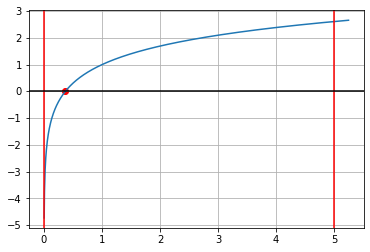

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import math

def getRoot_BisectionMethod(x_low, x_high, error_a, equation):
    iterations = 0
    error_a_iterations = math.nan
    x_c_previous = 0
    x_low_stored = x_low
    x_high_stored = x_high
    no_root = False
    while((error_a_iterations > error_a) or (math.isnan(error_a_iterations))):
        x_c_current = (x_high + x_low)/2
        f_x_low = equation(x_low)
        f_x_high = equation(x_high)
        f_x_c = equation(x_c_current)
        if (f_x_low*f_x_c < 0):
            x_high = x_c_current
        elif (f_x_high*f_x_c < 0):
            x_low = x_c_current
        else:
            print("There is not root in this range")
            x_c_current = math.nan
            no_root = True
            break
        if (iterations > 0):
            error_a_iterations = np.abs((x_c_current - x_c_previous)/x_c_current)*100
        print("Iteration =", iterations, \
              "  x_low =", round(x_low_stored, 5), \
              "  x_high=", round(x_high_stored, 5), \
              "  x_root_approx =", round(x_c_current, 5), \
              "  relative_error", round(error_a_iterations, 5))
        x_c_previous = x_c_current
        x_low_stored = x_low
        x_high_stored = x_high
        iterations += 1
    
    if (no_root == False):
        print("\nx_root_approx =", x_c_current, "whit relative_error = (+/-)", error_a, "%")
    return x_c_current

def plotFunctionAndRoot(x_low, x_high, x_root_approx, equation):
    x = np.linspace((x_low - 0.05*np.abs(x_high - x_low)), (x_high + 0.05*np.abs(x_high - x_low)), num = 1000)
    f_x = []
    for i in range(len(x)):
        f_x.append(equation(x[i]))
    
    plt.plot(x, f_x)
    if not(math.isnan(x_root_approx)):
        plt.scatter(x_root_approx, 0, color = 'r')
    plt.grid()
    plt.axvline(x_low, color = 'r')
    plt.axvline(x_high, color = 'r')
    plt.axhline(color = 'k')
    plt.show()
    
#**************************************************************************************************************
#**************************************************************************************************************
#**************************************************************************************************************

def equation(x):
    return np.log(x) + 1

x_root = getRoot_BisectionMethod(0, 5, 0.01, equation)
plotFunctionAndRoot(0, 5, x_root, equation)